In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_theme()

In [3]:
sns.set(rc={'figure.figsize':(12,10)})

In [4]:
df = pd.read_csv('Trx Data.csv', parse_dates=['Date'])

In [5]:
df

,CardID,Date,Amount
0,C0100000199,2001-08-20,229.00
1,C0100000199,2001-06-28,139.00
2,C0100000199,2001-12-29,229.00
3,C0100000343,2001-07-27,49.00
4,C0100000343,2001-02-02,169.99
...,...,...,...
69210,C0106596676,2001-02-07,189.00
69211,C0106596676,2001-02-18,49.00
69212,C0106596676,2001-02-10,24.99
69213,C0106596676,2001-07-15,49.99


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69215 entries, 0 to 69214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   CardID  69215 non-null  object        
 1   Date    69215 non-null  datetime64[ns]
 2   Amount  69215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe(include = 'all', datetime_is_numeric=False)

C:\Users\zaki9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CardID,Date,Amount
count,69215,69215,69215.000000
unique,12589,364,NaN
top,C0103133900,2001-06-27 00:00:00,NaN
freq,30,278,NaN
first,NaN,2001-01-01 00:00:00,NaN
last,NaN,2001-12-30 00:00:00,NaN
mean,NaN,NaN,77.966821
std,NaN,NaN,127.528813
min,NaN,NaN,1.490000
25%,NaN,NaN,6.990000


### Insight: only about 12589 unique cardIDs i.e. members. Top visiting customer(s) visited 30 times. Mean amount spent = 78, std = 127 (very spread out relative to the mean), min = 1.49, max = 2249, median = 25. 75% of transactions were 99 dollars and below.

## Exploring Customer Frequency:

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 1.0, 'Count of Customers by Frequency of Purchases')]

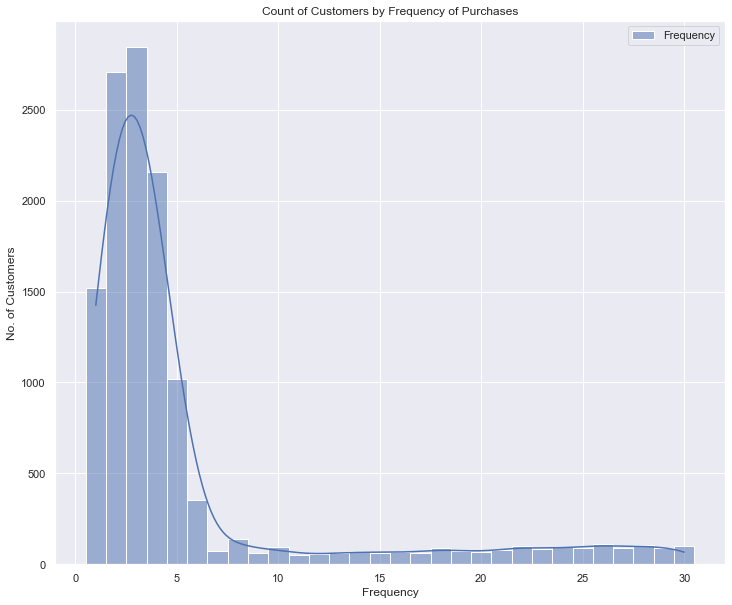

In [8]:
customer_frequency = pd.DataFrame(df['CardID'].value_counts())
customer_frequency.columns=['Frequency']
ax1 = sns.histplot(customer_frequency, kde=True, discrete = True)
ax1.set(xlabel = 'Frequency', ylabel = 'No. of Customers', title = 'Count of Customers by Frequency of Purchases')

### What we observe is that there is little variation in the number of customers who visit 7 times or more. The decrease in number of customers stops. We can try to rationalise this. The number of customers who visited between 1 and 6 times approximates a normal distribution, which is a common assumption for random customer visits. 

### For the number of customers who visited between 7 and 30 times, the deviation from a normal distribution to almost a flat distribution suggests that these customers are not driven by random desires or needs at the times of their visits, but that these visits are routine. We could test this theory by checking if they spend the same/similar amounts at each visit, and whether their visits follow a regular time interval.

## Exploring Transaction Amounts:

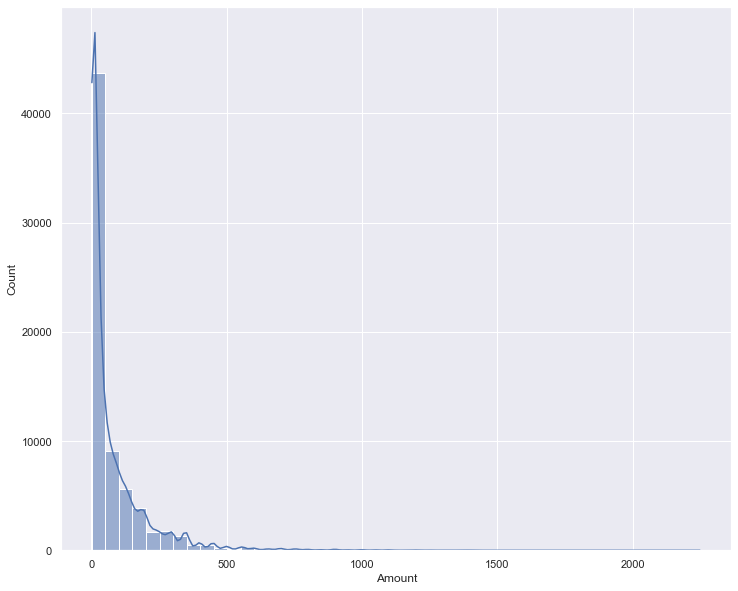

In [9]:
_ = sns.histplot(df['Amount'], binwidth = 50, kde=True)

### Note: From df.describe() earlier, we know that mean amount spent = 78, std = 127 (very spread out relative to the mean), min = 1.49, max = 2249, median = 25. 75% of transactions were 99 and below.

### Again, data heavily skewed towards smaller amounts. But we know there is a max amount of 2249.00. So the hist plot above can't show us a more detailed distribution of expenditure below 500 because it's trying to capture this max amount. We can split the data to investigate customers who spend less (500 or less) and those who spend more. Can also further split, as 500 is actually a large amount which is not typically spent at Cheers. We can also see that there are actually 40000+ entries for amount < 50. So there is much to explore there.

## Exploring the times of the transactions:

In [10]:
df_datetimeindex = df.set_index('Date')
df_datetimeindex

,CardID,Amount
Date,,
2001-08-20,C0100000199,229.00
2001-06-28,C0100000199,139.00
2001-12-29,C0100000199,229.00
2001-07-27,C0100000343,49.00
2001-02-02,C0100000343,169.99
...,...,...
2001-02-07,C0106596676,189.00
2001-02-18,C0106596676,49.00
2001-02-10,C0106596676,24.99


In [11]:
df_datetimeindex = df_datetimeindex.sort_index()
df_datetimeindex

,CardID,Amount
Date,,
2001-01-01,C0105669747,24.99
2001-01-01,C0105669747,39.99
2001-01-01,C0104755098,6.99
2001-01-01,C0100082574,84.00
2001-01-01,C0101456062,8.49
...,...,...
2001-12-30,C0101761085,219.00
2001-12-30,C0105542671,89.00
2001-12-30,C0101764514,34.99


In [12]:
df.to_csv('Trx Data_adjusted date.csv')

## Note: further EDA performed in Tableau

Tableau link: https://public.tableau.com/profile/zaki4637#!/vizhome/CheersData/TotalAmountTransactedperDay?publish=yes

In [13]:
from IPython import display

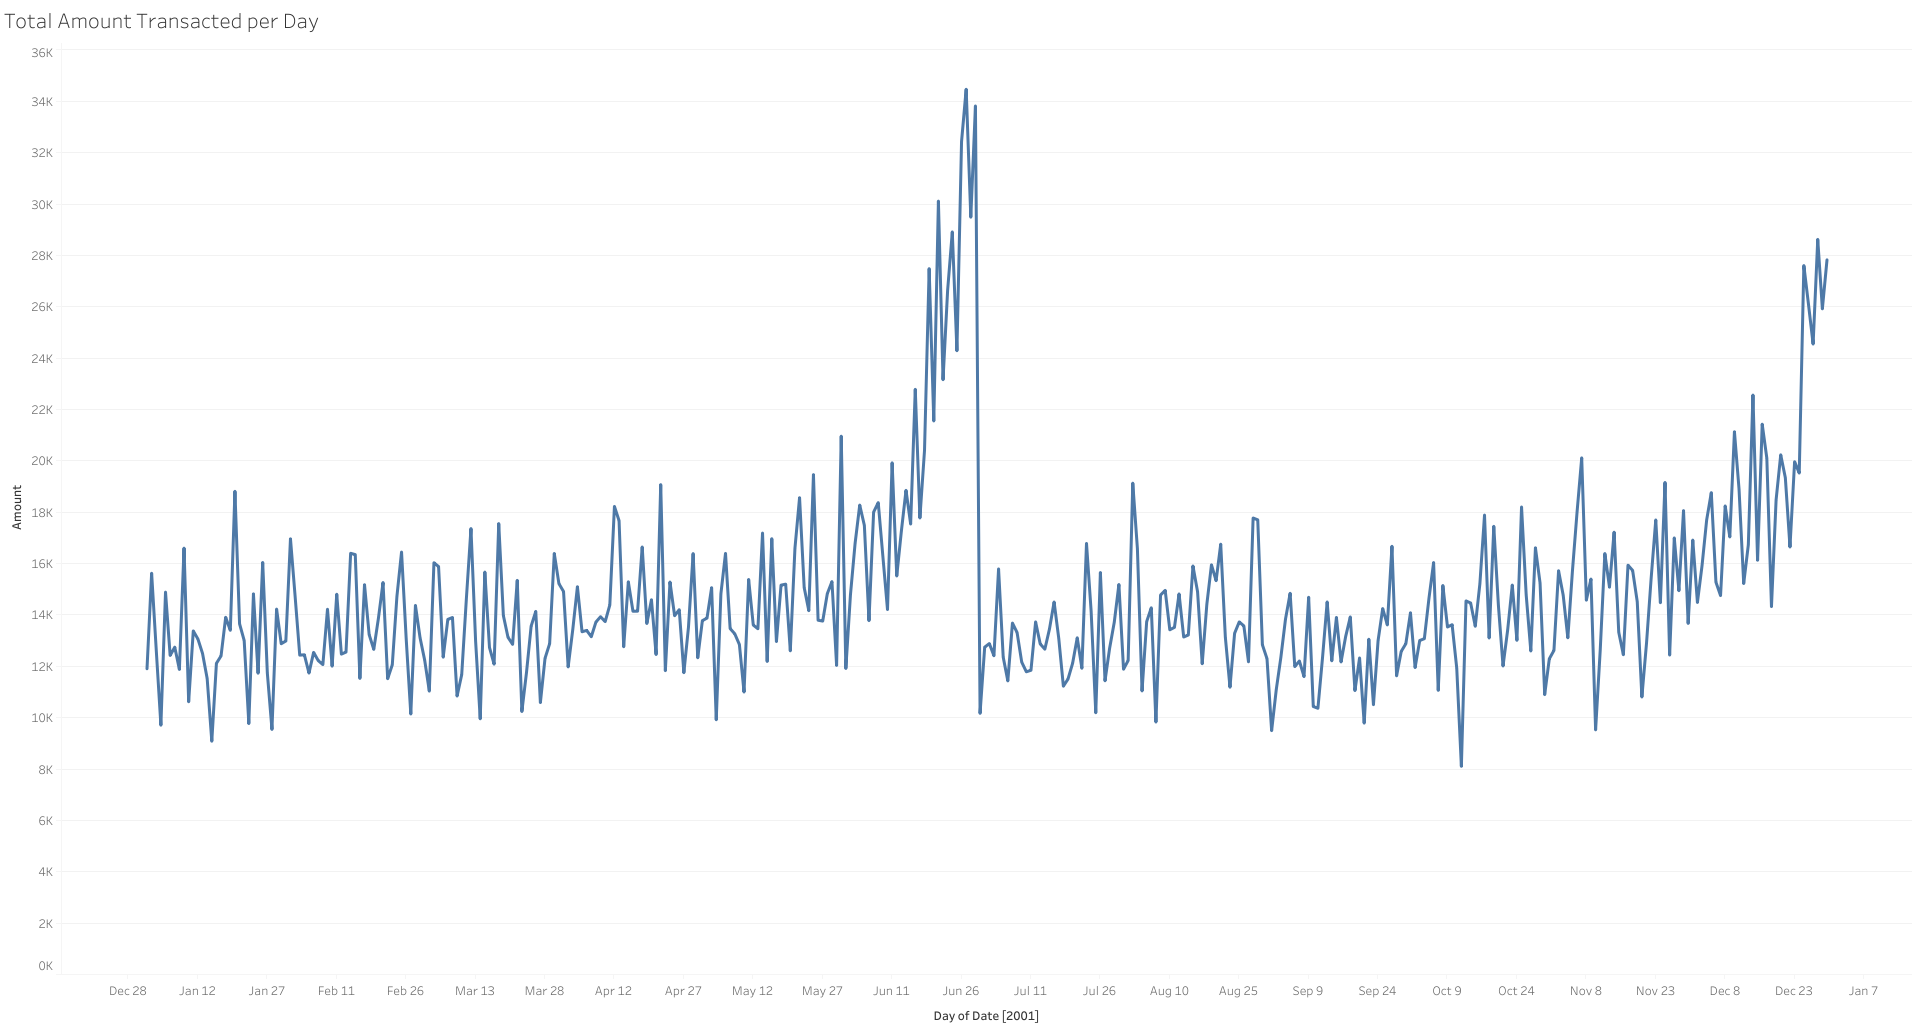

In [14]:
display.Image("Total Amount Transacted per Day.png")

## Insight: peaks in the transaction volume were observed in June and December. We can focus promotions with these in mind.

# RFM Analysis

## The tool that we will be using to identify customer segments will be a Recency, Frequency, and Monetary Value (RFM) analysis. Each category will be splirt into 4 quartiles, and customers will be assigned quartiles and given an aggregate score/number.

In [15]:
import datetime as dt

sd = dt.datetime(2002,1,1)
df['hist']= sd - df['Date']
df['hist'].astype('timedelta64[D]')
df['hist']= df['hist'] / np.timedelta64(1, 'D')
df.head()

,CardID,Date,Amount,hist
0,C0100000199,2001-08-20,229.00,134.0
1,C0100000199,2001-06-28,139.00,187.0
2,C0100000199,2001-12-29,229.00,3.0
3,C0100000343,2001-07-27,49.00,158.0
4,C0100000343,2001-02-02,169.99,333.0


In [16]:
rfm_table=df.groupby('CardID').agg({'hist': lambda x:x.min(), # Recency
                                                'CardID': lambda x: len(x), # Frequency
                                                'Amount': lambda x: x.sum()})    # Monetary 


rfm_table.rename(columns={'hist': 'Recency', 
                         'CardID': 'Frequency',
                         'Amount': 'Monetary_value'}, inplace=True)

rfm_table

,Recency,Frequency,Monetary_value
CardID,,,
C0100000199,3.0,3,597.00
C0100000343,116.0,6,700.94
C0100000375,61.0,4,223.98
C0100000482,22.0,4,197.98
C0100000689,6.0,2,428.00
...,...,...,...
C0106595162,94.0,2,388.99
C0106596136,7.0,2,108.99
C0106596422,136.0,2,948.00


In [17]:
quartiles = rfm_table.quantile(q=[0.25,0.50,0.75])
quartiles=quartiles.to_dict()
quartiles

{'Recency': {0.25: 21.0, 0.5: 59.0, 0.75: 130.0},
 'Frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary_value': {0.25: 206.80000000000007, 0.5: 341.44, 0.75: 528.0}}

In [18]:
## define function to identify Recency category by quartile

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    

In [19]:
rfmSeg = rfm_table
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['Monetary_value'].apply(FMClass, args=('Monetary_value',quartiles,))

In [20]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [21]:
rfmSeg.sort_values(by=['RFMClass', 'Monetary_value'], ascending=[True, False])

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CardID,,,,,,,
C0102569919,8.0,8,5818.98,1,1,1,111
C0102682721,11.0,23,3654.85,1,1,1,111
C0105214117,15.0,12,2924.35,1,1,1,111
C0103579564,5.0,8,2745.97,1,1,1,111
C0101489624,17.0,18,2741.80,1,1,1,111
...,...,...,...,...,...,...,...
C0103422291,155.0,1,5.99,4,4,4,444
C0105854094,168.0,1,5.99,4,4,4,444
C0102289932,187.0,1,4.99,4,4,4,444


In [22]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']

In [23]:
rfmSeg.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CardID,,,,,,,,
C0100000199,3.0,3,597.00,1,3,1,131,5
C0100000343,116.0,6,700.94,3,1,1,311,5
C0100000375,61.0,4,223.98,3,2,3,323,8
C0100000482,22.0,4,197.98,2,2,4,224,8
C0100000689,6.0,2,428.00,1,4,2,142,7


## Note: Customers with low RFMClass and Total Scores are those who scored best according to the RFM analysis.

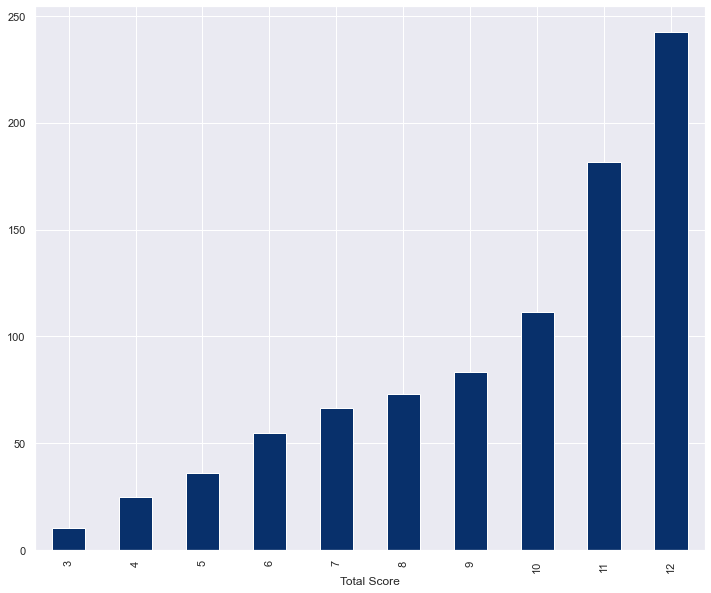

In [24]:
_ = rfmSeg.groupby('Total Score').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')

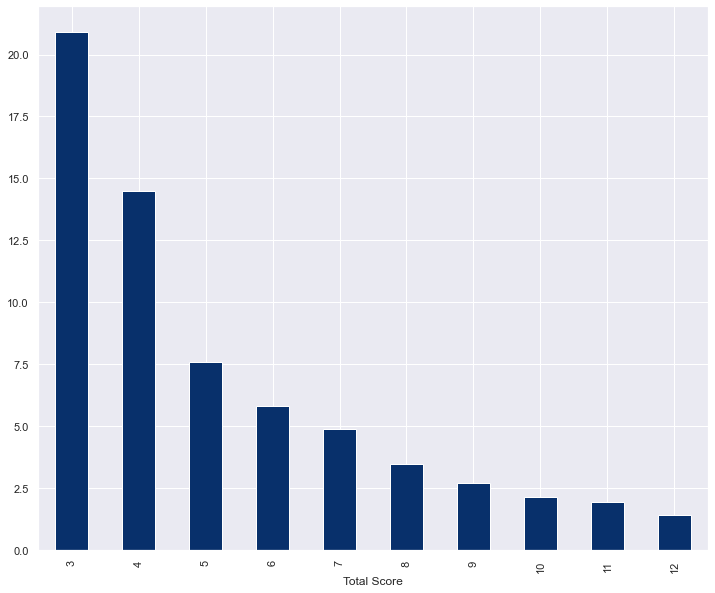

In [25]:
_ = rfmSeg.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

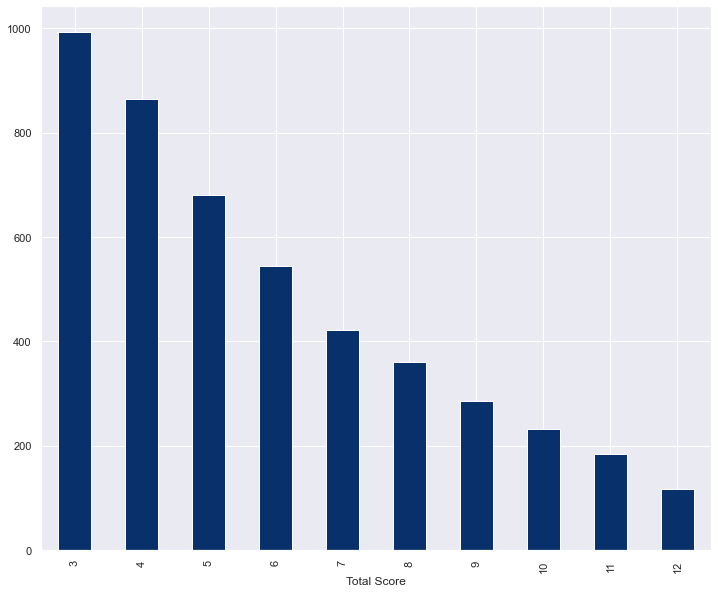

In [26]:
_ = rfmSeg.groupby('Total Score').agg('Monetary_value').mean().plot(kind='bar', colormap='Blues_r')

## Insight: The three graphs above demonstrate that on average, there is a monotonic relationship between the Total Score and the 3 basic metrics (R, F, and M). This indicates that if we want to do a quick comparison between customers, the Total Score in itself is a reasonably good representation of a customer's value in all 3 aspects.

## Note: We can extract the profiles of the customers using their RFMClass to decide what strategy to apply to each RFMClass

In [27]:
#Who are the worst customers?
#RFMClass = 444
rfmSeg[rfmSeg['RFMClass']=='444'].sort_values('Monetary_value', ascending=False)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CardID,,,,,,,,
C0106511655,199.0,2,205.99,4,4,4,444,12
C0100902165,214.0,2,205.99,4,4,4,444,12
C0100629695,211.0,2,203.99,4,4,4,444,12
C0103753078,141.0,2,203.00,4,4,4,444,12
C0105214786,140.0,2,203.00,4,4,4,444,12
...,...,...,...,...,...,...,...,...
C0105854094,168.0,1,5.99,4,4,4,444,12
C0103422291,155.0,1,5.99,4,4,4,444,12
C0102289932,187.0,1,4.99,4,4,4,444,12


In [28]:
#who are the best/most valuable customers?
#RFMClass = 111

rfmSeg[rfmSeg['RFMClass']=='111'].sort_values('Recency',ascending=False)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CardID,,,,,,,,
C0103838551,21.0,15,684.30,1,1,1,111,3
C0100126148,21.0,7,1404.97,1,1,1,111,3
C0100214932,21.0,20,1457.88,1,1,1,111,3
C0101162330,21.0,17,673.80,1,1,1,111,3
C0101161845,21.0,6,835.94,1,1,1,111,3
...,...,...,...,...,...,...,...,...
C0100730638,2.0,30,743.18,1,1,1,111,3
C0104142147,2.0,23,668.17,1,1,1,111,3
C0100656469,2.0,6,1004.98,1,1,1,111,3


In [29]:
#Which customers are at the verge of churning? 
#Customers who's recency value is high and frequency value is low

rfmSeg[np.logical_and(rfmSeg['R_Quartile'] == 4, rfmSeg['F_Quartile'] == 4)].sort_values('Monetary_value', ascending=False)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CardID,,,,,,,,
C0106484769,142.0,2,2448.00,4,4,1,441,9
C0100871119,167.0,2,1798.00,4,4,1,441,9
C0105913867,262.0,1,1699.00,4,4,1,441,9
C0106107054,229.0,2,1598.00,4,4,1,441,9
C0104475412,140.0,2,1598.00,4,4,1,441,9
...,...,...,...,...,...,...,...,...
C0103422291,155.0,1,5.99,4,4,4,444,12
C0105854094,168.0,1,5.99,4,4,4,444,12
C0102289932,187.0,1,4.99,4,4,4,444,12


In [30]:
#who are loyal/responsive customers?
rfmSeg[rfmSeg['F_Quartile'] == 1 ].sort_values('Monetary_value', ascending=False)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CardID,,,,,,,,
C0106349454,135.0,8,7192.00,4,1,1,411,6
C0102569919,8.0,8,5818.98,1,1,1,111,3
C0101511567,135.0,20,5283.92,4,1,1,411,6
C0102682721,11.0,23,3654.85,1,1,1,111,3
C0101171316,61.0,30,3368.78,3,1,1,311,5
...,...,...,...,...,...,...,...,...
C0101409789,18.0,6,46.94,1,1,4,114,6
C0102634599,11.0,6,44.94,1,1,4,114,6
C0105259419,10.0,6,44.94,1,1,4,114,6


## Note: we can also see which total scores/RFMClass have the biggest share of the dataset, which is one way to see which customer segments may be worth targeting to bump up to the next score/class.

In [31]:
rfmSeg['Total Score'].value_counts()

7     2000
8     1963
9     1747
6     1498
10    1201
12    1009
11     827
3      817
5      817
4      710
Name: Total Score, dtype: int64

In [32]:
rfmSeg['RFMClass'].value_counts()

444    1009
111     817
211     413
322     359
443     353
       ... 
313      37
213      29
214      26
414      22
314       3
Name: RFMClass, Length: 64, dtype: int64

## Note: Possible ways to craft our promotions would be to target the largest segments from the total scores or RFM scores. However, there are drawbacks to both approaches. 

## For Total Score, the drawback is that for each score, there are several different permutations for R, F, and M scores (e.g. 313 vs 142). Therefore promotions targeted at individual total scores would not be applicable to all customers of those scores.

## For RFM Class, we have visibility of the largest RFM classes and tailor our promotions to them, but we cannot tailor promotions for every group, as we have limited resources.

## Solution: Apply an alternative solution. Cluster customers into 4 broad segments for which we can generalise promotions. We will use k-means for this.

# Applying k-means, k=4

In [33]:
X=rfmSeg[['R_Quartile','F_Quartile','M_Quartile']]

from sklearn.preprocessing import StandardScaler
RFM_std = pd.DataFrame(data = X, columns = ['R_Quartile','F_Quartile','M_Quartile'])
RFM_std.describe()

,R_Quartile,F_Quartile,M_Quartile
count,12589.000000,12589.000000,12589.000000
mean,2.492811,2.712209,2.500596
std,1.122417,1.117157,1.117687
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000


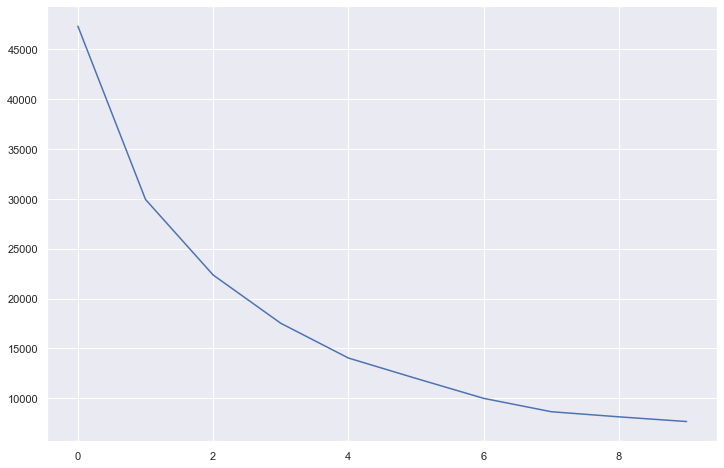

In [34]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(RFM_std.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(inertia)

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(RFM_std.values)

KMeans(n_clusters=4, random_state=0)

In [36]:
RFM_std['cluster']= kmeans.labels_
RFM_std.replace({'cluster' :{0:1, 1:2, 2:3, 3:4}}, inplace = True)

In [37]:
RFM_std

,R_Quartile,F_Quartile,M_Quartile,cluster
CardID,,,,
C0100000199,1,3,1,4
C0100000343,3,1,1,3
C0100000375,3,2,3,3
C0100000482,2,2,4,1
C0100000689,1,4,2,1
...,...,...,...,...
C0106595162,3,4,2,2
C0106596136,1,4,4,1
C0106596422,4,4,1,3


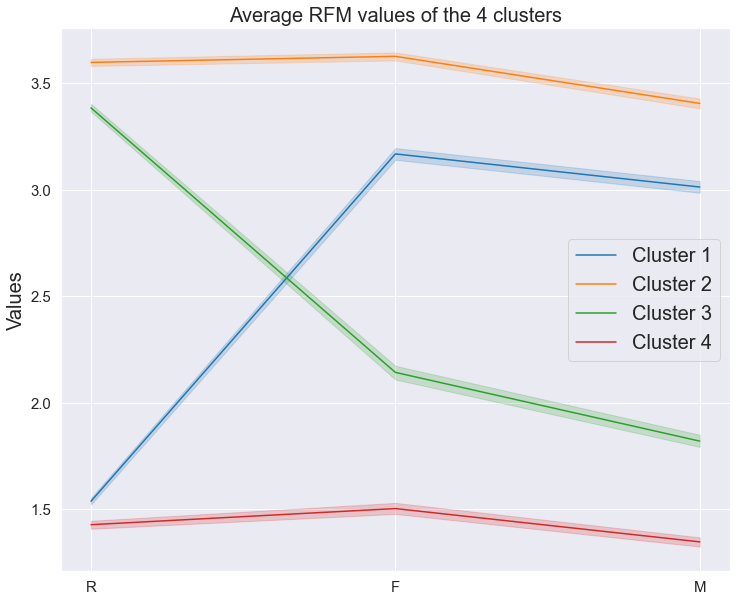

In [38]:
melted_RFM=pd.melt(RFM_std.reset_index(),
                  id_vars=['cluster'],
                   value_vars=['R_Quartile','F_Quartile','M_Quartile',],
                   var_name='Features',
                   value_name='Value'
                  )

line = sns.lineplot(x='Features',y='Value',hue='cluster',data=melted_RFM, palette = 'tab10')
line.set_xlabel('')
line.set_ylabel('Values', fontsize = 20)
line.set_xticks([0,1,2])
line.set_xticklabels(['R', 'F', 'M'])
line.tick_params(axis='both', which='major', labelsize=15)
plt.title('Average RFM values of the 4 clusters', size = 20)
line.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], prop={'size': 20})
_ = plt.plot

## Note: we will use the R, F, and M scores of the 4 clusters to generalise 4 broad customer segments to target.